# Exploratory Data Analysis (EDA)

In this notebook, we will perform exploratory data analysis on the fraud detection dataset. The goal is to understand the data better and identify patterns that may help in building a predictive model.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualisation style
sns.set(style='whitegrid')

In [ ]:
# Load the dataset
train_data = pd.read_csv('../data/raw/train.csv')
test_data = pd.read_csv('../data/raw/test.csv')

# Display the first few rows of the training data
train_data.head()

,transaction_id,step,type,amount,customer_id,age,is_fraud
0,38d8cd1a-ab64-48a8-982b-547db096f8a5,421,PAYMENT,311000,C13646530,24,0
1,2440928e-8a4c-4e74-a9c5-6329668be13d,325,PAYMENT,399600,C9452763,25,0
2,973c2a3c-5676-477c-ac30-81334b01e90d,565,PAYMENT,7500,C31260354,38,0
3,5413d0f4-b4f0-406f-bd91-91de1dce573c,511,TRANSFER,94000,C8841991,26,0
4,c9fa99e2-42c8-4dd8-94ba-aa3e44bfdd98,63,CASH_OUT,15000,C3176716,26,0


In [ ]:
# Check for missing values
missing_values = train_data.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

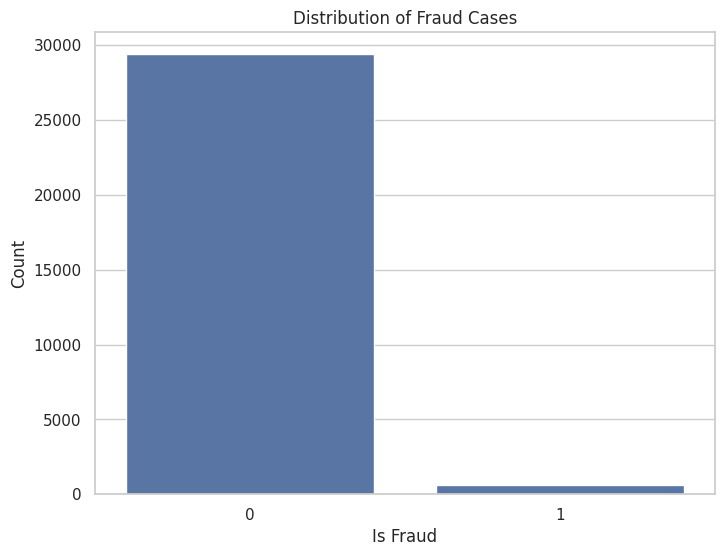

In [ ]:
# Visualize the distribution of the target variable 'is_fraud'
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=train_data)
plt.title('Distribution of Fraud Cases')
plt.xlabel('Is Fraud')
plt.ylabel('Count')
plt.show()

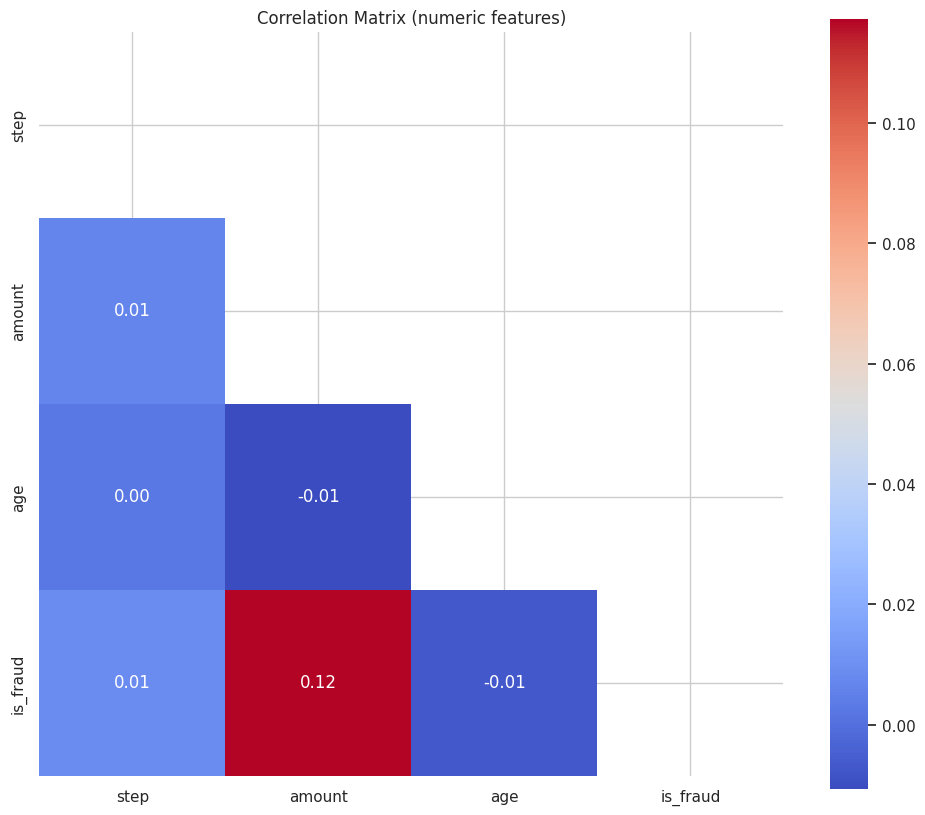

In [ ]:
# Visualize correlations between features (only numeric columns; fallback: encode categoricals)
plt.figure(figsize=(12, 10))

# Exclure colonnes évidentes d'identifiants / forte cardinalité
exclude_cols = ['id', 'transaction_id']  # adapter si nécessaire
df = train_data.copy()
df = df.drop(columns=[c for c in exclude_cols if c in df.columns])

# Choisir les colonnes numériques utilisables
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols = [c for c in numeric_cols if df[c].nunique() > 1]  # ignorer colonnes constantes

if len(numeric_cols) > 0:
    correlation_matrix = df[numeric_cols].corr()
else:
    # Si pas de numériques, encoder les catégorielles (après imputation simple)
    df_enc = df.fillna('NA').copy()
    for col in df_enc.select_dtypes(include=['object', 'category']):
        df_enc[col] = df_enc[col].astype('category').cat.codes
    correlation_matrix = df_enc.corr()

# Affichage (masque triangle supérieur pour lisibilité)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', mask=mask, square=True)
plt.title('Correlation Matrix (numeric features)')
plt.show()

## Conclusion

In this notebook, we performed exploratory data analysis on the fraud detection dataset. We examined the distribution of the target variable, checked for missing values, and visualized correlations between features. This analysis will guide us in the feature engineering and modeling phases.